In [2]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Modules for ML
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('seaborn')
%matplotlib inline

In [3]:
df = pd.read_csv(r"Documents\spotify_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [5]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [7]:
std = StandardScaler()
scalled = std.fit_transform(df.drop('liked',axis=1))

In [8]:
i = 0 
for column in df.columns[:-1]:
    df[column] = scalled[:,i]
    i += 1

In [9]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,0
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,1
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,0
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,1
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,1


In [10]:
x, y = df.drop('liked',axis=1),df['liked']
x.shape, y.shape

((195, 13), (195,))

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((136, 13), (59, 13), (136,), (59,))

In [12]:
y_train.value_counts()

1    68
0    68
Name: liked, dtype: int64

In [13]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [14]:
model.fit(x_train, y_train, epochs=200) 

Epoch 1/200
5/5 [==============================] - 3s 12ms/step - loss: 0.6866 - accuracy: 0.5441
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.6713 - accuracy: 0.5809
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 0.6597 - accuracy: 0.6029
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.6103
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6471
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.6618
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.6985
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.7059
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5925 - accuracy: 0.7353
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7353
Epoch 11/200
5/5 [==========

In [15]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 23ms/step - loss: 0.2180 - accuracy: 0.9153


[0.21796460449695587, 0.9152542352676392]

In [16]:
def predict(data):
    pred = model.predict(data).flatten()
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def plot_cm(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='g',cmap='YlGnBu')
    plt.title(title)
    plt.show()

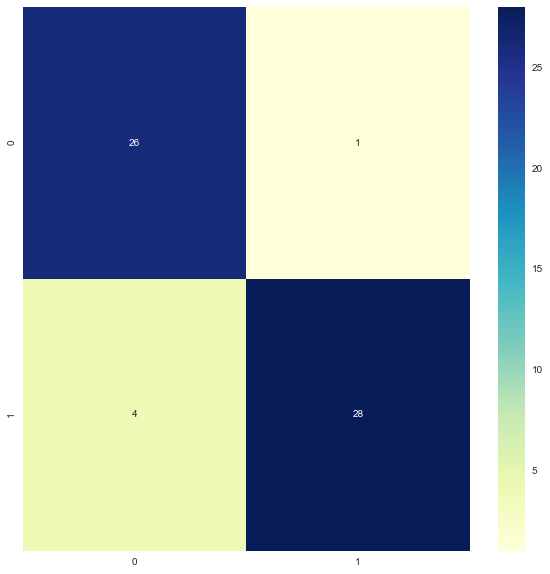

In [17]:
#Test Data Report
y_pred_test = predict(x_test)
plot_cm(y_test, y_pred_test)

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        32

    accuracy                           0.92        59
   macro avg       0.92      0.92      0.92        59
weighted avg       0.92      0.92      0.92        59



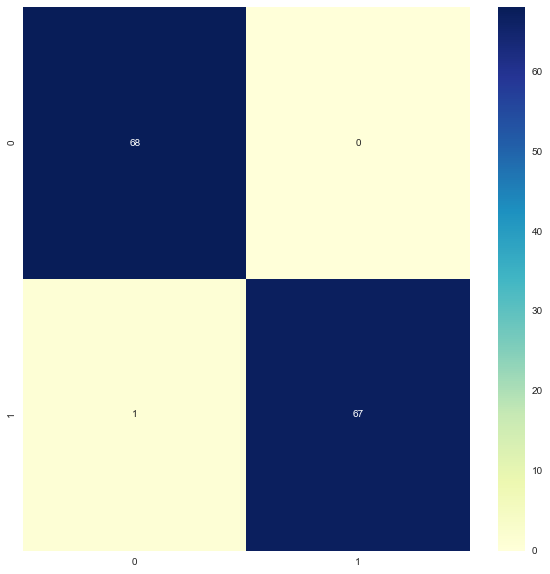

In [19]:
#Train Data Report
y_pred_train = predict(x_train)
plot_cm(y_train, y_pred_train)

In [20]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        68

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136

